In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# from google.colab import files
# uploaded = files.upload()

**Dataset Description:**
        The dataset appears to be related to the Israeli-Palestinian conflict, covering the period from 2000 to 2023. It includes columns such as "name," "date_of_event," "age," "citizenship," "event_location," "event_location_district," "event_location_region," "date_of_death," "gender," "took_part_in_the_hostilities," "place_of_residence," "place_of_residence_district," "type_of_injury," "ammunition," "killed_by," and "notes." These columns collectively provide information about individuals, events, and circumstances during this timeframe in the context of the conflict.





**Importing  the necessay Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.neural_network import MLPClassifier
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings("ignore")

In [ ]:
#Dataset Loading
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv")
#data = uploaded

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Displaying Dataset Information**

In [ ]:
# Display
data.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...


In [ ]:
data.dtypes

name                             object
date_of_event                    object
age                             float64
citizenship                      object
event_location                   object
event_location_district          object
event_location_region            object
date_of_death                    object
gender                           object
took_part_in_the_hostilities     object
place_of_residence               object
place_of_residence_district      object
type_of_injury                   object
ammunition                       object
killed_by                        object
notes                            object
dtype: object

In [ ]:
data.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [ ]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)


name                             0.000000
date_of_event                    0.000000
age                              1.159655
citizenship                      0.000000
event_location                   0.000000
event_location_district          0.000000
event_location_region            0.000000
date_of_death                    0.000000
gender                           0.179791
took_part_in_the_hostilities    12.855088
place_of_residence               0.611291
place_of_residence_district      0.611291
type_of_injury                   2.615965
ammunition                      47.222222
killed_by                        0.000000
notes                            2.517080
dtype: float64


The dataset exhibits varying degrees of missing values:



1. 'took_part_in_the_hostilities' follows with 12.86%.
2.   'ammunition' has the highest at 47.22%.
3. 'age', 'type_of_injury', 'place_of_residence', and 'place_of_residence_district' have lower percentages of missing values ranging from 0.18% to 2.62%.










<Axes: >

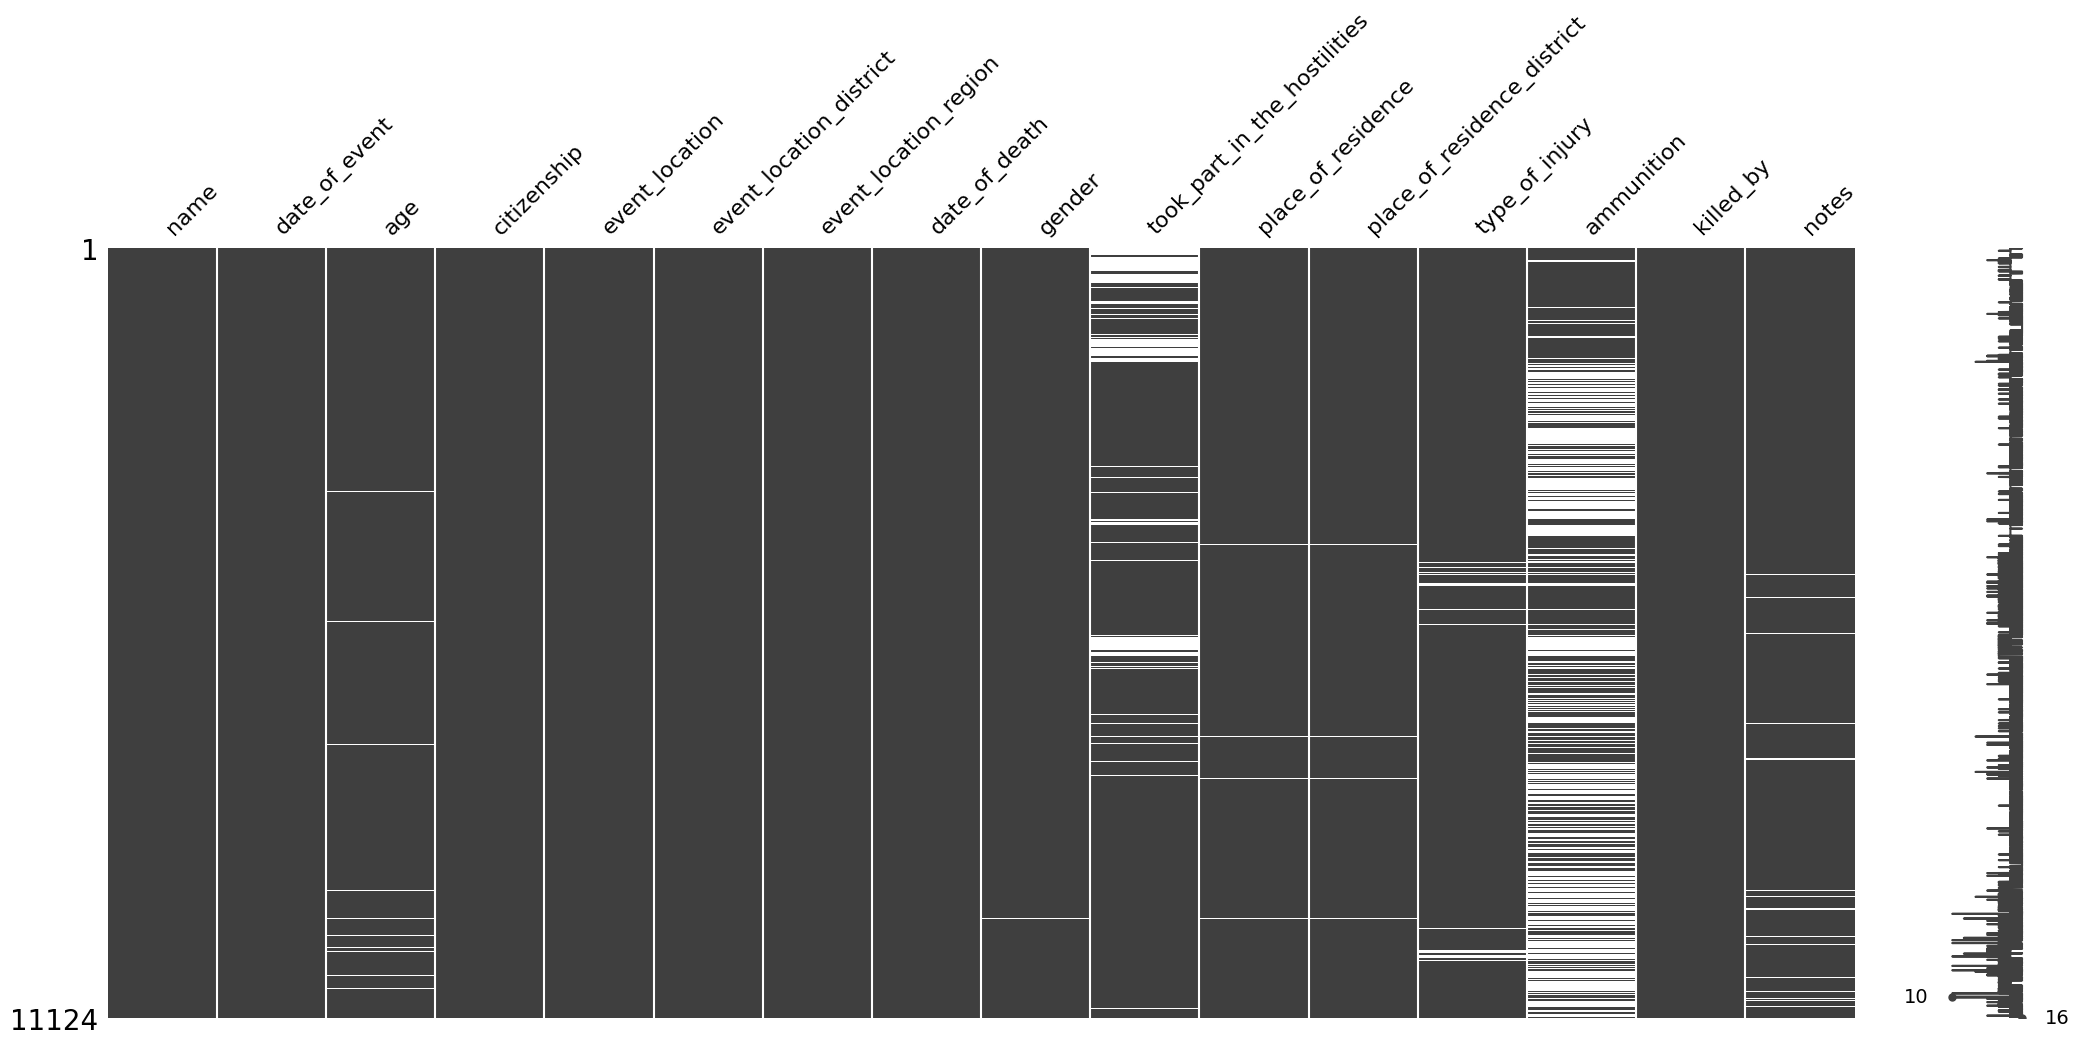

In [ ]:
msno.matrix(data)

In [ ]:
label_encoder = LabelEncoder()

# Impute missing values with median
data.loc[:, 'gender'] = label_encoder.fit_transform(data['gender'])


# Impute missing values with mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)

# Impute missing values  with 'Unknown'
data['took_part_in_the_hostilities'].fillna('Unknown', inplace=True)

# Drop rows with missing values
data = data.dropna(subset=['place_of_residence', 'place_of_residence_district'])

# Impute missing values  with mode
data['type_of_injury'].fillna(data['type_of_injury'].mode()[0], inplace=True)

In [ ]:
print(f'\020[94mNumber of records/rows & features/columns in the dataset are: {data.shape[0], data.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {data.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(data.isna().sum())}')

Number of records/rows & features/columns in the dataset are: (11056, 16)
Number of duplicate entries in the dataset are: 0
Number missing values in the dataset are: 5578


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11056 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11056 non-null  object 
 1   date_of_event                 11056 non-null  object 
 2   age                           10951 non-null  float64
 3   citizenship                   11056 non-null  object 
 4   event_location                11056 non-null  object 
 5   event_location_district       11056 non-null  object 
 6   event_location_region         11056 non-null  object 
 7   date_of_death                 11056 non-null  object 
 8   gender                        11056 non-null  int64  
 9   took_part_in_the_hostilities  11056 non-null  object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                11056 non-null  object 
 13  a

In [ ]:
data['event_date'] = pd.to_datetime(data['date_of_event']).dt.date
data['e_year'] = pd.to_datetime(data['date_of_event']).dt.year
data['e_month'] = pd.to_datetime(data['date_of_event']).dt.month
data['e_day'] = pd.to_datetime(data['date_of_event']).dt.day

data['death_date'] = pd.to_datetime(data['date_of_death']).dt.date
data['d_year'] = pd.to_datetime(data['date_of_death']).dt.year
data['d_month'] = pd.to_datetime(data['date_of_death']).dt.month
data['d_day'] = pd.to_datetime(data['date_of_death']).dt.day

print(data[['event_date', 'e_year', 'e_month', 'e_day']].head(5))
print(data[['death_date', 'd_year', 'd_month', 'd_day']].head(5))
data.describe(include='all').transpose()

   event_date  e_year  e_month  e_day
0  2023-09-24    2023        9     24
1  2023-09-24    2023        9     24
2  2023-09-22    2023        9     22
3  2023-09-20    2023        9     20
4  2023-09-19    2023        9     19
   death_date  d_year  d_month  d_day
0  2023-09-24    2023        9     24
1  2023-09-24    2023        9     24
2  2023-09-22    2023        9     22
3  2023-09-20    2023        9     20
4  2023-09-19    2023        9     19


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,11056,11037,Ibrahim Sha'ban 'Abdallah al-Zein,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_event,11056,2398,2008-12-27,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10951.0,NaN,NaN,NaN,26.731075,13.774986,1.0,19.0,23.0,31.0,112.0
citizenship,11056,4,Palestinian,10047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_location,11056,491,Gaza City,2227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_location_district,11056,20,Gaza,2428,NaN,NaN,NaN,NaN,NaN,NaN,NaN
event_location_region,11056,3,Gaza Strip,7708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_of_death,11056,2584,2008-12-27,341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,11056.0,NaN,NaN,NaN,0.872106,0.333987,0.0,1.0,1.0,1.0,1.0
took_part_in_the_hostilities,11056,5,No,4645,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
blue_shades = ['#ADD8E6', '#4682B4', '#6A5ACD', '#00C78C', '#87CEFA']


fig = px.bar(data['e_year'].value_counts().reset_index(), x='index', y='e_year',
             title='Count of Death over the Year',
             labels={'index': 'Year', 'e_year': 'Number of deaths'},
             color='index',  # Set the color directly
             color_discrete_sequence=blue_shades,  #the color palette
             template='plotly_dark')


for trace in fig.data:
    for i, value in enumerate(trace.y):
        fig.add_annotation(x=trace.x[i], y=value, text=str(value),
                           showarrow=False, font=dict(color='white'))


fig.update_layout(
    title=dict(x=0.5),
    xaxis_title='Year',
    legend_title='Year',
    font=dict(family='Arial', size=12),
    height=500,  # Adjust height as needed
)

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



plot_df = data.groupby(['d_year', 'citizenship']).size().reset_index(name='count')


plot_df = plot_df.sort_values(by='d_year')


fig = px.pie(plot_df, names='citizenship', values='count',
             title='Fatalities by Citizenship Over the Years',
             color='citizenship',
             labels={'citizenship': 'Citizenship', 'count': 'Count'},
             template='plotly_dark')


fig.update_layout(
    title=dict(x=0.5),
    legend=dict(title=dict(text='Citizenship'), orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1),
    font=dict(family='Arial', size=12),
    height=500,  #Adjust Height
)


fig.show()


In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

# dark theme
px.defaults.template = "plotly_dark"

dark_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig_age = make_subplots(rows=1, cols=3, subplot_titles=[
    'Fatalities by Age: Histogram',
    'Fatalities by Age: Violin Plot',
    'Fatalities by Age: Scatter Plot'
])

# Fatalities by Age: Histogram
fig_age.add_trace(px.histogram(data, x='age', nbins=28).update_traces(marker_color=dark_colors[0]).data[0], row=1, col=1)

# Fatalities by Age: Violin Plot
fig_age.add_trace(px.violin(data, y='age', box=True, points="all").update_traces(marker_color=dark_colors[1]).data[0], row=1, col=2)

# Fatalities by Age: Scatter Plot
fig_age.add_trace(px.scatter(data, x='age').update_traces(marker_color=dark_colors[2], opacity=0.3).data[0], row=1, col=3)

fig_age.update_layout(title_text='Fatalities by Age', showlegend=False, paper_bgcolor='black', plot_bgcolor='black', font=dict(color='white'))

fig_age.show()


In [ ]:
import plotly.express as px
import pandas as pd


px.defaults.template = "plotly_dark"

# Top 10 Event Locations
top_locations = data['event_location'].value_counts().head(10).index

# Top 10 Event Locations
fig_top_locations = px.bar(data['event_location'].value_counts().reset_index().head(10), x='index', y='event_location',
                            title='Top 10 Event Locations: Bar Chart', labels={'event_location': 'Count', 'index': 'Event Location'},
                            color='event_location', color_discrete_sequence=px.colors.sequential.Greens)

fig_top_locations.update_layout(showlegend=False, paper_bgcolor='black', plot_bgcolor='black', font=dict(color='white'))

fig_top_locations.show()


In [ ]:
import plotly.express as px

px.defaults.template = "plotly_dark"

# Fatalities by Event Location Region: Pie Chart
fig_pie = px.pie(data['event_location_region'].value_counts().reset_index(), names='index', values='event_location_region',
                 title='Fatalities by Event Location Region: Pie Chart', color='event_location_region',
                 color_discrete_sequence=px.colors.sequential.Blues, hole=0.2,
                 labels={'index': 'Event Location Region', 'event_location_region': 'Count'},
                 template="plotly_dark")


fig_pie.update_layout(showlegend=True, width=800, height=600)  # Adjust width and height
fig_pie.update_traces(textinfo='percent+label')


fig_pie.show()

# Fatalities by Gender: Barplot
fig_bar = px.bar(data['gender'].value_counts().reset_index(), x='index', y='gender',
                 title='Fatalities by Gender: Barplot', color='gender',
                 color_discrete_sequence=px.colors.sequential.Purples,
                 labels={'index': 'Gender', 'gender': 'Count'},
                 template="plotly_dark")


fig_bar.update_layout(showlegend=True, width=800, height=600)  # Adjust width and height
fig_bar.update_traces(texttemplate='%{y}', textposition='outside')

fig_bar.show()


In [ ]:
import plotly.express as px
import numpy as np


px.defaults.template = "plotly_dark"

# Generate a random color
random_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for _ in range(3)]

# Group Responsible, by Age, by Gender: Violinplot
fig_violin_age_gender = px.violin(data, x='killed_by', y='age', color='gender', box=True,
                                  color_discrete_sequence=random_colors,
                                  title='Group Responsible, by Age, by Gender : Violinplot',
                                  labels={'killed_by': 'Group Responsible', 'age': 'Age', 'gender': 'Gender'},
                                  template="plotly_dark")

# Group Responsible, by Age & Participation: Violinplot
fig_violin_age_participation = px.violin(data, x='killed_by', y='age', color='took_part_in_the_hostilities',
                                         title='Group Responsible, by Age & Participation : Violinplot',
                                         labels={'killed_by': 'Group Responsible', 'age': 'Age',
                                                 'took_part_in_the_hostilities': 'Participation'},
                                         template="plotly_dark")

# Group Responsible, by Ammunition: Clustered Bar Chart
fig_ammunition = px.histogram(data, x='killed_by', color='ammunition', barmode='stack',
                               color_discrete_sequence=random_colors,
                               title='Group Responsible, by Ammunition: Clustered Bar Chart',
                               labels={'killed_by': 'Group Responsible', 'ammunition': 'Ammunition'},
                               template="plotly_dark")


# Show the interactive plots
fig_violin_age_gender.show()
fig_violin_age_participation.show()
fig_ammunition.show()



Model Training and Predictions for Forecasting

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv")

In [ ]:
label_encoder = LabelEncoder()
data.loc[:, 'gender'] = label_encoder.fit_transform(data['gender'])
data['gender'].fillna(data['gender'].mode()[0], inplace=True)
data['took_part_in_the_hostilities'].fillna('Unknown', inplace=True)
data = data.dropna(subset=['place_of_residence', 'place_of_residence_district'])
data['type_of_injury'].fillna(data['type_of_injury'].mode()[0], inplace=True)

<ipython-input-24-92312985394f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type_of_injury'].fillna(data['type_of_injury'].mode()[0], inplace=True)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib



selected_columns = ['age', 'citizenship', 'event_location', 'event_location_district',
                     'event_location_region', 'gender', 'took_part_in_the_hostilities',
                     'place_of_residence', 'place_of_residence_district', 'type_of_injury',
                     'date_of_event', 'date_of_death']
data.columns = [col.strip("'") for col in data.columns]

missing_columns = [col for col in selected_columns if col not in data.columns]
if missing_columns:
    print(f"Columns {missing_columns} are not present in the DataFrame.")

data = data[selected_columns]

data = data.dropna()

label_encoder = LabelEncoder()
data.loc[:, 'citizenship'] = label_encoder.fit_transform(data['citizenship'])

date_columns = ['date_of_event', 'date_of_death']
missing_date_columns = [col for col in date_columns if col not in data.columns]
if missing_date_columns:
    print(f"Columns {missing_date_columns} are not present in the DataFrame.")
else:
    data['date_of_event'] = pd.to_datetime(data['date_of_event'], errors='coerce')
    data['date_of_death'] = pd.to_datetime(data['date_of_death'], errors='coerce')
    data.loc[:, 'date_of_event'] = pd.to_datetime(data['date_of_event'])
    data.loc[:, 'event_year'] = data['date_of_event'].dt.year
    data.loc[:, 'event_month'] = data['date_of_event'].dt.month
    data.loc[:, 'event_day'] = data['date_of_event'].dt.day
    data.loc[:, 'date_of_death'] = pd.to_datetime(data['date_of_death'])
    data.loc[:, 'death_year'] = data['date_of_death'].dt.year
    data.loc[:, 'death_month'] = data['date_of_death'].dt.month
    data.loc[:, 'death_day'] = data['date_of_death'].dt.day


    data = data.drop(date_columns, axis=1)


data_encoded = pd.get_dummies(data, columns=['event_location', 'event_location_district',
                                             'event_location_region', 'took_part_in_the_hostilities',
                                             'place_of_residence', 'place_of_residence_district',
                                             'type_of_injury'])


X = data_encoded.drop('citizenship', axis=1)
y = data_encoded['citizenship']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multi-layer Perceptron': MLPClassifier(),
    'XGBoost': XGBClassifier()
}

# list to store the trained models
trained_models = []

accuracies = []

for clf_name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)

    # Save the trained model
    model_filename = f'{clf_name.replace(" ", "_")}_model.joblib'
    joblib.dump(clf, model_filename)
    trained_models.append(model_filename)

    # Make predictions
    y_pred = clf.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'\n{clf_name} Accuracy: {accuracy}')
    print(classification_report(y_test, y_pred))

# Plot accuracies
plt.figure(figsize=(10, 6))
plt.bar(classifiers.keys(), accuracies, color='b')
plt.title('Accuracy of Different Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

print("Trained Models:", trained_models)



Random Forest Accuracy: 0.9972615244180739
              precision    recall  f1-score   support

           1       0.99      0.97      0.98       200
           3       1.00      1.00      1.00      1991

    accuracy                           1.00      2191
   macro avg       1.00      0.99      0.99      2191
weighted avg       1.00      1.00      1.00      2191


K-Nearest Neighbors Accuracy: 0.9397535371976267
              precision    recall  f1-score   support

           1       0.80      0.46      0.58       200
           3       0.95      0.99      0.97      1991

    accuracy                           0.94      2191
   macro avg       0.87      0.72      0.77      2191
weighted avg       0.93      0.94      0.93      2191



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Accuracy: 0.9648562300319489
              precision    recall  f1-score   support

           1       1.00      0.61      0.76       200
           3       0.96      1.00      0.98      1991

    accuracy                           0.96      2191
   macro avg       0.98      0.81      0.87      2191
weighted avg       0.97      0.96      0.96      2191


Decision Tree Accuracy: 0.9977179370150616
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       200
           3       1.00      1.00      1.00      1991

    accuracy                           1.00      2191
   macro avg       1.00      0.99      0.99      2191
weighted avg       1.00      1.00      1.00      2191


Support Vector Machine Accuracy: 0.9087174806024646
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       200
           3       0.91      1.00      0.95      1991

    accuracy                       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Naive Bayes Accuracy: 0.9817434961204929
              precision    recall  f1-score   support

           1       0.87      0.98      0.92       200
           2       0.00      0.00      0.00         0
           3       1.00      0.98      0.99      1991

    accuracy                           0.98      2191
   macro avg       0.62      0.66      0.64      2191
weighted avg       0.99      0.98      0.98      2191



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



AdaBoost Accuracy: 0.9940666362391603
              precision    recall  f1-score   support

           1       1.00      0.94      0.97       200
           3       0.99      1.00      1.00      1991

    accuracy                           0.99      2191
   macro avg       1.00      0.97      0.98      2191
weighted avg       0.99      0.99      0.99      2191


Gradient Boosting Accuracy: 0.9972615244180739
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       200
           3       1.00      1.00      1.00      1991

    accuracy                           1.00      2191
   macro avg       1.00      0.98      0.99      2191
weighted avg       1.00      1.00      1.00      2191


Multi-layer Perceptron Accuracy: 0.9963486992240986
              precision    recall  f1-score   support

           1       1.00      0.96      0.98       200
           3       1.00      1.00      1.00      1991

    accuracy                           1.0

ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: object

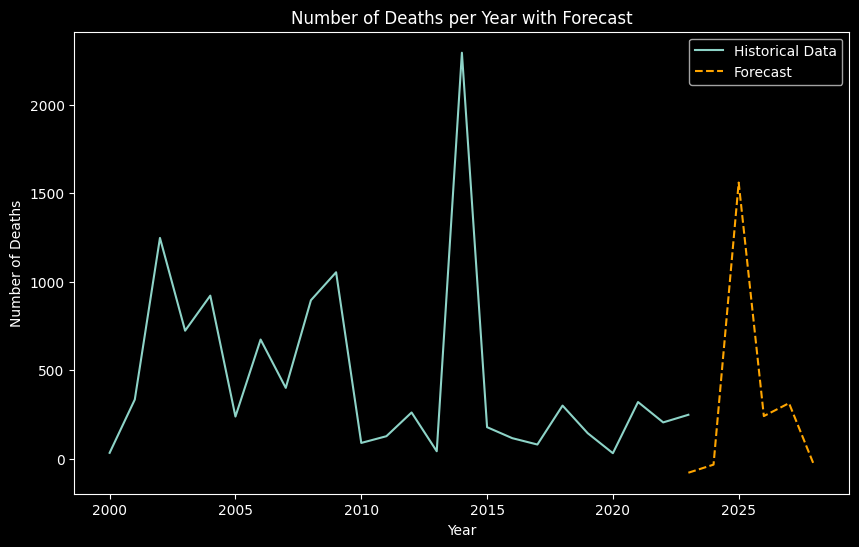

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


deaths_per_year = data['death_year'].value_counts().sort_index()

best_model = None
best_aic = float('inf')

for seasonal_periods in range(2, 13):
    for trend_type in ['add', 'additive', 'multiplicative']:
        model = ExponentialSmoothing(deaths_per_year, seasonal='add', seasonal_periods=seasonal_periods, trend=trend_type)
        result = model.fit()
        aic = result.aic

        if aic < best_aic:
            best_aic = aic
            best_model = result

# Make prediction
future_years = range(data['death_year'].max() + 0, data['death_year'].max() + 6)
forecast = best_model.forecast(steps=len(future_years))

plt.style.use('dark_background')

plt.figure(figsize=(10, 6))
plt.plot(deaths_per_year.index, deaths_per_year.values, label='Historical Data')
plt.plot(future_years, forecast, label='Forecast', linestyle='dashed', color='orange')
plt.title('Number of Deaths per Year with Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()


Epoch 1/50
2587/2587 - 9s - loss: 0.0012 - 9s/epoch - 3ms/step
Epoch 2/50
2587/2587 - 5s - loss: 0.0011 - 5s/epoch - 2ms/step
Epoch 3/50
2587/2587 - 7s - loss: 0.0011 - 7s/epoch - 3ms/step
Epoch 4/50
2587/2587 - 5s - loss: 0.0011 - 5s/epoch - 2ms/step
Epoch 5/50
2587/2587 - 5s - loss: 0.0010 - 5s/epoch - 2ms/step
Epoch 6/50
2587/2587 - 7s - loss: 0.0010 - 7s/epoch - 3ms/step
Epoch 7/50
2587/2587 - 5s - loss: 0.0010 - 5s/epoch - 2ms/step
Epoch 8/50
2587/2587 - 5s - loss: 0.0010 - 5s/epoch - 2ms/step
Epoch 9/50
2587/2587 - 7s - loss: 0.0010 - 7s/epoch - 3ms/step
Epoch 10/50
2587/2587 - 5s - loss: 0.0010 - 5s/epoch - 2ms/step
Epoch 11/50
2587/2587 - 6s - loss: 0.0010 - 6s/epoch - 2ms/step
Epoch 12/50
2587/2587 - 6s - loss: 0.0010 - 6s/epoch - 2ms/step
Epoch 13/50
2587/2587 - 5s - loss: 0.0010 - 5s/epoch - 2ms/step
Epoch 14/50
2587/2587 - 6s - loss: 0.0010 - 6s/epoch - 2ms/step
Epoch 15/50
2587/2587 - 5s - loss: 0.0010 - 5s/epoch - 2ms/step
Epoch 16/50
2587/2587 - 5s - loss: 0.0010 - 5s/ep

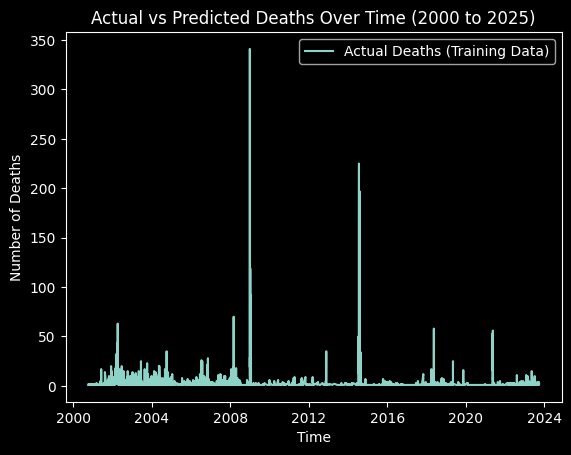

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping


data = pd.read_csv("/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv")

# Data preprocessing and feature extraction
data_encoded = pd.get_dummies(data, columns=['killed_by'])

selected_columns = ['date_of_event', 'citizenship', 'gender', 'date_of_death', 'killed_by']
data_lstm = data[selected_columns]

# Handle missing values
data_lstm = data_lstm.dropna()

# Extract features from date columns
data_lstm['date_of_death'] = pd.to_datetime(data_lstm['date_of_death'])
data_lstm['death_year'] = data_lstm['date_of_death'].dt.year
data_lstm['death_month'] = data_lstm['date_of_death'].dt.month
data_lstm['death_day'] = data_lstm['date_of_death'].dt.day

# Count the number of deaths per day
deaths_per_day = data_lstm.groupby('date_of_death').size().reset_index(name='deaths')
deaths_per_day = deaths_per_day.set_index('date_of_death')

# Train-test split
train, test = train_test_split(deaths_per_day, test_size=0.2, shuffle=False)

# Normalize the data
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
deaths_per_day_scaled = scaler_lstm.fit_transform(deaths_per_day)

def create_dataset(sequence, look_back):
    X, Y = [], []
    for i in range(len(sequence) - look_back):
        X.append(sequence[i:(i + look_back)])
        Y.append(sequence[i + look_back])
    return np.array(X), np.array(Y)


look_back_lstm = 5
X_lstm, Y_lstm = create_dataset(deaths_per_day_scaled, look_back_lstm)


X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], 1, X_lstm.shape[1]))

# Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model_lstm.fit(X_lstm, Y_lstm, epochs=50, batch_size=1, verbose=2)

# Generate sequences of prediction for 2024
future_steps = 365  # Assuming 365 days
future_dates = pd.date_range(start='2024-01-01', periods=future_steps, freq='D')

# Scale the future
future_dates_scaled = scaler_lstm.transform(np.array(future_dates).reshape(-1, 1))

extended_sequence = np.concatenate((deaths_per_day_scaled[-look_back_lstm:], future_dates_scaled))

# Create sequences for prediction
X_future, _ = create_dataset(extended_sequence, look_back_lstm)

X_future = np.reshape(X_future, (X_future.shape[0], 1, X_future.shape[1]))

# Make predictions for the future
future_predict = model_lstm.predict(X_future)

# Invert predictions
future_predict = scaler_lstm.inverse_transform(future_predict)

plt.plot(deaths_per_day.index, deaths_per_day['deaths'], label='Actual Deaths (Training Data)')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('Actual vs Predicted Deaths Over Time (2000 to 2025)')
plt.show()


Mean Absolute Error: 73.72384544526497


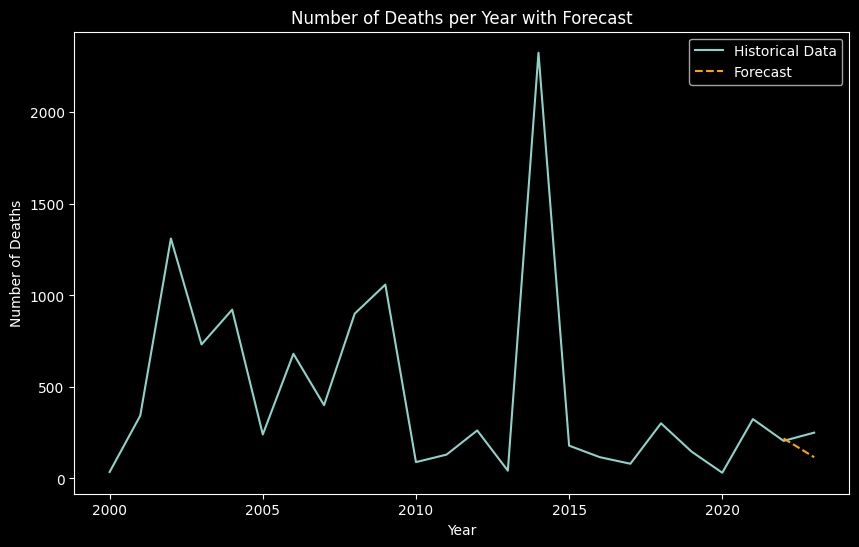

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv")
selected_columns = ['date_of_event', 'citizenship', 'gender', 'date_of_death']
data = data[selected_columns]
data = data.dropna()
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['citizenship'] = label_encoder.fit_transform(data['citizenship'])

# Extract features from date columns
data['date_of_event'] = pd.to_datetime(data['date_of_event'])
data['event_year'] = data['date_of_event'].dt.year
data['event_month'] = data['date_of_event'].dt.month
data['event_day'] = data['date_of_event'].dt.day

data['date_of_death'] = pd.to_datetime(data['date_of_death'])
data['death_year'] = data['date_of_death'].dt.year
data['death_month'] = data['date_of_death'].dt.month
data['death_day'] = data['date_of_death'].dt.day

# Count the number of deaths per year
deaths_per_year = data['death_year'].value_counts().sort_index()

# Hyperparameter tuning with modified TimeSeriesSplit
best_model = None
best_aic = float('inf')

tscv = TimeSeriesSplit(n_splits=10)
for train_index, test_index in tscv.split(deaths_per_year):
    train_data, test_data = deaths_per_year.iloc[train_index], deaths_per_year.iloc[test_index]

    best_seasonal_periods = None
    best_forecast = None
    best_mae = float('inf')

    for seasonal_periods in range(2, min(13, len(train_data) // 2)):
        model = ExponentialSmoothing(
            train_data, trend='add', seasonal='add', seasonal_periods=seasonal_periods, damped=True
        )
        try:
            result = model.fit()
        except ValueError as e:
            print(f"Error for seasonal_periods={seasonal_periods}: {e}")
            continue

        forecast = result.forecast(steps=len(test_data))
        mae = mean_absolute_error(test_data, forecast)

        if mae < best_mae:
            best_mae = mae
            best_model = result
            best_seasonal_periods = seasonal_periods
            best_forecast = forecast

future_years = range(data['death_year'].max() + 1, data['death_year'].max() + 6)
forecast = best_model.forecast(steps=len(future_years)+1)

mae = mean_absolute_error(test_data, best_forecast[:len(test_data)])
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(10, 6))
plt.plot(deaths_per_year.index, deaths_per_year.values, label='Historical Data')
plt.plot(range(data['death_year'].max() - len(test_data) + 1, data['death_year'].max() + 1), best_forecast, label='Forecast', linestyle='dashed', color='orange')
plt.title('Number of Deaths per Year with Forecast')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show()


Epoch 1/100
2068/2068 - 9s - loss: 0.0014 - val_loss: 2.8090e-04 - 9s/epoch - 4ms/step
Epoch 2/100
2068/2068 - 6s - loss: 0.0013 - val_loss: 1.8918e-04 - 6s/epoch - 3ms/step
Epoch 3/100
2068/2068 - 7s - loss: 0.0013 - val_loss: 1.8179e-04 - 7s/epoch - 3ms/step
Epoch 4/100
2068/2068 - 5s - loss: 0.0012 - val_loss: 1.8161e-04 - 5s/epoch - 2ms/step
Epoch 5/100
2068/2068 - 6s - loss: 0.0012 - val_loss: 1.7793e-04 - 6s/epoch - 3ms/step
Epoch 6/100
2068/2068 - 6s - loss: 0.0012 - val_loss: 1.8148e-04 - 6s/epoch - 3ms/step
Epoch 7/100
2068/2068 - 5s - loss: 0.0012 - val_loss: 1.9075e-04 - 5s/epoch - 3ms/step
Epoch 8/100
2068/2068 - 7s - loss: 0.0012 - val_loss: 1.9699e-04 - 7s/epoch - 3ms/step
Epoch 9/100
2068/2068 - 5s - loss: 0.0012 - val_loss: 1.8192e-04 - 5s/epoch - 2ms/step
Epoch 10/100
2068/2068 - 6s - loss: 0.0012 - val_loss: 3.3756e-04 - 6s/epoch - 3ms/step
Epoch 11/100
2068/2068 - 6s - loss: 0.0012 - val_loss: 1.7975e-04 - 6s/epoch - 3ms/step
Epoch 12/100
2068/2068 - 5s - loss: 0.001

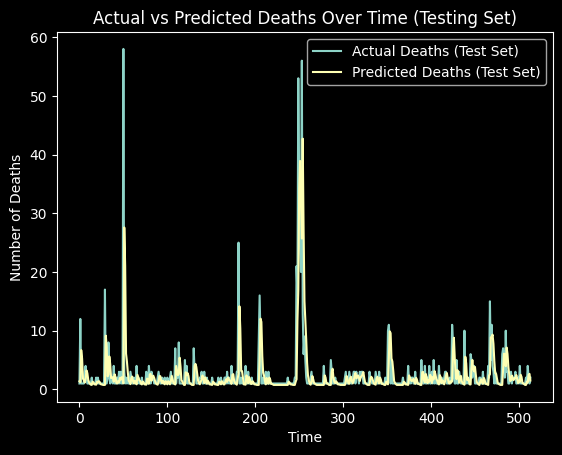

2/2 [==============================] - 0s 4ms/step


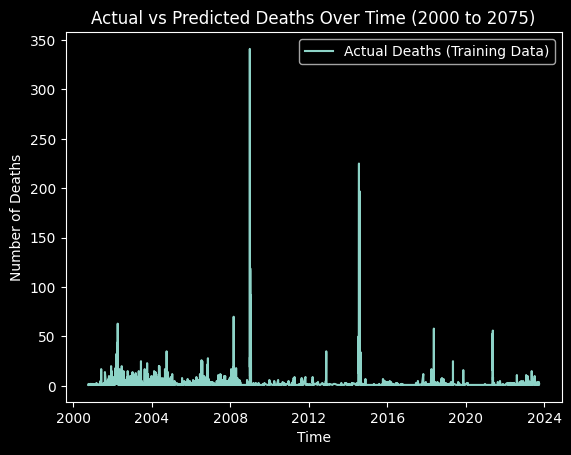

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib

# Function to create dataset for LSTM
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Load
data = pd.read_csv("/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv")

# Data preprocessing
data_encoded = pd.get_dummies(data, columns=['killed_by'])

selected_columns = ['date_of_event', 'citizenship', 'gender', 'date_of_death', 'killed_by']
data_lstm = data[selected_columns]

# Handle missing values
data_lstm = data_lstm.dropna()

# Encode categorical variables
label_encoder = LabelEncoder()
data_lstm['gender'] = label_encoder.fit_transform(data_lstm['gender'])
data_lstm['citizenship'] = label_encoder.fit_transform(data_lstm['citizenship'])

# Extract features from date columns
data_lstm['date_of_event'] = pd.to_datetime(data_lstm['date_of_event'])
data_lstm['event_year'] = data_lstm['date_of_event'].dt.year
data_lstm['event_month'] = data_lstm['date_of_event'].dt.month
data_lstm['event_day'] = data_lstm['date_of_event'].dt.day

data_lstm['date_of_death'] = pd.to_datetime(data_lstm['date_of_death'])
data_lstm['death_year'] = data_lstm['date_of_death'].dt.year
data_lstm['death_month'] = data_lstm['date_of_death'].dt.month
data_lstm['death_day'] = data_lstm['date_of_death'].dt.day

# Filter data time period from 2000 to 2025
data_lstm_filtered = data_lstm[(data_lstm['date_of_death'] >= '2000-01-01') & (data_lstm['date_of_death'] <= '2025-12-31')]

# Count the number of deaths per day
deaths_per_day = data_lstm_filtered.groupby('date_of_death').size().reset_index(name='deaths')
deaths_per_day = deaths_per_day.set_index('date_of_death')

# Normalize the data
scaler_lstm = MinMaxScaler(feature_range=(0, 1))
deaths_per_day_scaled = scaler_lstm.fit_transform(deaths_per_day)

# Split the data into training and testing
train_size = int(len(deaths_per_day_scaled) * 0.80)
test_size = len(deaths_per_day_scaled) - train_size
train, test = deaths_per_day_scaled[0:train_size, :], deaths_per_day_scaled[train_size:len(deaths_per_day_scaled), :]

# Create datasets for training and testing
look_back_lstm = 5
X_train, Y_train = create_dataset(train, look_back_lstm)
X_test, Y_test = create_dataset(test, look_back_lstm)

# Reshape the data for LSTM input [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build and train the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, look_back_lstm)))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
model_lstm.fit(X_train, Y_train, epochs=100, batch_size=1, validation_data=(X_test, Y_test), verbose=2)

# Save the trained model
model_lstm.save('/content/sample_data/model_lstm.h5')

# Save the MinMaxScaler object
joblib.dump(scaler_lstm, '/content/sample_data/scaler_lstm.joblib')

# Make predictions on the training and testing sets
train_predict = model_lstm.predict(X_train)
test_predict = model_lstm.predict(X_test)

# Invert predictions
train_predict = scaler_lstm.inverse_transform(train_predict)
test_predict = scaler_lstm.inverse_transform(test_predict)
Y_train = scaler_lstm.inverse_transform([Y_train])
Y_test = scaler_lstm.inverse_transform([Y_test])

# Calculate root mean squared error for training and testing sets
train_score = np.sqrt(mean_squared_error(Y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(Y_test[0], test_predict[:, 0]))

print(f'Train Score: {train_score}')
print(f'Test Score: {test_score}')

# Plot the results with labels for the testing set
plt.plot(Y_test[0], label='Actual Deaths (Test Set)')
plt.plot(test_predict[:, 0], label='Predicted Deaths (Test Set)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('Actual vs Predicted Deaths Over Time (Testing Set)')
plt.show()

# Generate sequences of  prediction
future_steps = 50
future_dates = pd.date_range(start='2025-12-31', periods=future_steps, freq='D')

# Scale the future dates
future_dates_scaled = scaler_lstm.transform(np.array(future_dates).reshape(-1, 1))

# Create a sequence for prediction using the last part of the training data and the future dates
extended_sequence = np.concatenate((deaths_per_day_scaled[-look_back_lstm:], future_dates_scaled))

# Create sequences for prediction
X_future, _ = create_dataset(extended_sequence, look_back_lstm)

# Reshape the data for LSTM input [samples, time steps, features]
X_future = np.reshape(X_future, (X_future.shape[0], 1, X_future.shape[1]))

# Make predictions for the future
future_predict = model_lstm.predict(X_future)

# Invert predictions
future_predict = scaler_lstm.inverse_transform(future_predict)

# Plot the results with labels for the extended time period
plt.plot(deaths_per_day.index, deaths_per_day['deaths'], label='Actual Deaths (Training Data)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('Actual vs Predicted Deaths Over Time (2000 to 2075)')
plt.show()


Root Mean Squared Error: 6.200410204591493


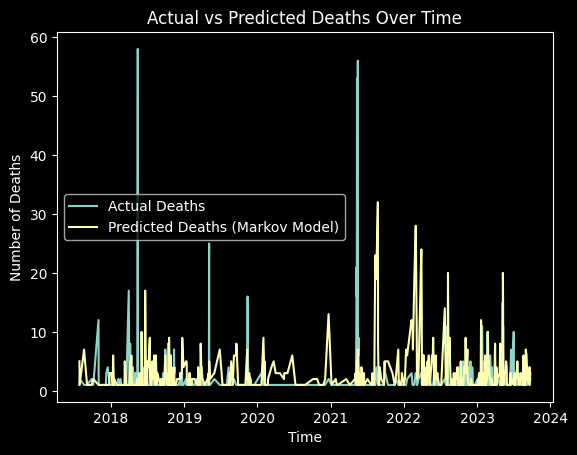

In [ ]:
!pip install joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
import joblib



data = pd.read_csv("/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv")

# Data preprocessing and feature extraction
data_encoded = pd.get_dummies(data, columns=['killed_by'])

selected_columns = ['date_of_event', 'citizenship', 'gender', 'date_of_death', 'killed_by']
data_markov = data[selected_columns]

# Handle missing values
data_markov = data_markov.dropna()

# Extract features from date columns
data_markov['date_of_death'] = pd.to_datetime(data_markov['date_of_death'])
data_markov['death_year'] = data_markov['date_of_death'].dt.year
data_markov['death_month'] = data_markov['date_of_death'].dt.month
data_markov['death_day'] = data_markov['date_of_death'].dt.day

# Count the number of deaths per day
deaths_per_day = data_markov.groupby('date_of_death').size().reset_index(name='deaths')
deaths_per_day = deaths_per_day.set_index('date_of_death')

# Train-test split
train, test = train_test_split(deaths_per_day, test_size=0.2, shuffle=False)

# The Markov model
class MarkovModel:
    def __init__(self):
        self.transition_matrix = None

    def fit(self, X):
        unique_states = np.unique(X)
        num_states = len(unique_states)
        transition_matrix = np.zeros((num_states, num_states))

        for i in range(len(X) - 1):
            current_state = np.where(unique_states == X[i])[0][0]
            next_state = np.where(unique_states == X[i + 1])[0][0]
            transition_matrix[current_state, next_state] += 1

        # Normalize transition matrix
        row_sums = transition_matrix.sum(axis=1)
        self.transition_matrix = transition_matrix / row_sums[:, np.newaxis]

    def predict(self, initial_state, steps):
        current_state = initial_state
        predicted_states = [current_state]

        for _ in range(steps):
            next_state = np.random.choice(np.arange(len(self.transition_matrix[current_state])), p=self.transition_matrix[current_state])
            predicted_states.append(next_state)
            current_state = next_state

        return np.array(predicted_states)

# Train  Markov model
markov_model = MarkovModel()
markov_model.fit(train['deaths'].values)

# Make predictions
initial_state = np.where(np.unique(deaths_per_day['deaths'].values) == train['deaths'].values[-1])[0][0]
predicted_states = markov_model.predict(initial_state, steps=len(test) - 1)  # Adjusted to cover the entire test set

# Invert predictions
predicted_deaths = np.unique(deaths_per_day['deaths'].values)[predicted_states]

# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(test['deaths'], predicted_deaths))
print(f'Root Mean Squared Error: {rmse}')


plt.plot(test.index, test['deaths'], label='Actual Deaths')
plt.plot(test.index, predicted_deaths, label='Predicted Deaths (Markov Model)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('Actual vs Predicted Deaths Over Time')
plt.show()


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=test.index, y=test['deaths'], mode='lines', name='Actual Deaths', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=test.index, y=predicted_deaths, mode='lines', name='Predicted Deaths (Markov Model)', line=dict(color='orange')))
fig.update_layout(
    title='Actual vs Predicted Deaths Over Time',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Number of Deaths'),
    showlegend=True
)
#  tooltips
hovertemplate = '<b>%{y}</b><br>Time: %{x}<extra></extra>'
fig.update_traces(hovertemplate=hovertemplate, hoverinfo='y+x')

fig.show()


Root Mean Squared Error: 12.64164448705891


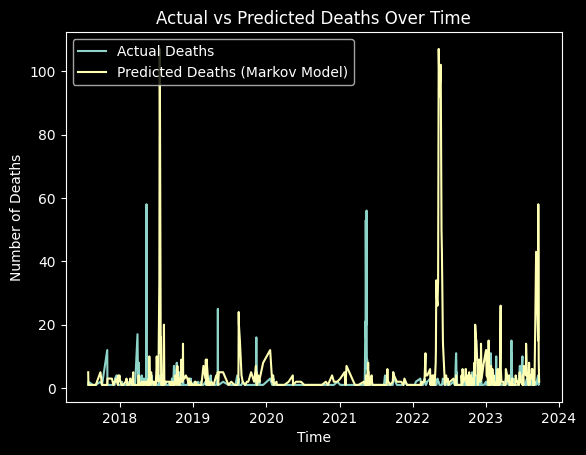

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = pd.read_csv("/content/drive/MyDrive/fatalities_isr_pse_conflict_2000_to_2023.csv")

# Data preprocessing and feature extraction
data_encoded = pd.get_dummies(data, columns=['killed_by'])

selected_columns = ['date_of_event', 'citizenship', 'gender', 'date_of_death', 'killed_by']
data_markov = data[selected_columns]

# Handle missing values
data_markov = data_markov.dropna()

# Extract features from date columns
data_markov['date_of_death'] = pd.to_datetime(data_markov['date_of_death'])
data_markov['death_year'] = data_markov['date_of_death'].dt.year
data_markov['death_month'] = data_markov['date_of_death'].dt.month
data_markov['death_day'] = data_markov['date_of_death'].dt.day

# Count the number of deaths per day
deaths_per_day = data_markov.groupby('date_of_death').size().reset_index(name='deaths')
deaths_per_day = deaths_per_day.set_index('date_of_death')

# Train-test split
train, test = train_test_split(deaths_per_day, test_size=0.2, shuffle=False)

class MarkovModel:
    def __init__(self):
        self.transition_matrix = None

    def fit(self, X):
        unique_states = np.unique(X)
        num_states = len(unique_states)
        transition_matrix = np.zeros((num_states, num_states))

        for i in range(len(X) - 1):
            current_state = np.where(unique_states == X[i])[0][0]
            next_state = np.where(unique_states == X[i + 1])[0][0]
            transition_matrix[current_state, next_state] += 1

        # Normalize transition matrix
        row_sums = transition_matrix.sum(axis=1)
        self.transition_matrix = transition_matrix / row_sums[:, np.newaxis]

    def predict(self, initial_state, steps):
        current_state = initial_state
        predicted_states = [current_state]

        for _ in range(steps):
            next_state = np.random.choice(np.arange(len(self.transition_matrix[current_state])), p=self.transition_matrix[current_state])
            predicted_states.append(next_state)
            current_state = next_state

        return np.array(predicted_states)

# Train the Markov model
markov_model = MarkovModel()
markov_model.fit(train['deaths'].values)

# Make predictions for the next 2 years
initial_state = np.where(np.unique(deaths_per_day['deaths'].values) == train['deaths'].values[-1])[0][0]
prediction_steps = len(test)  # Adjusted to cover the entire test set
predicted_states = markov_model.predict(initial_state, steps=prediction_steps)

# Invert predictions
predicted_deaths = np.unique(deaths_per_day['deaths'].values)[predicted_states]

# Calculate root mean squared error
rmse = np.sqrt(mean_squared_error(test['deaths'], predicted_deaths[:len(test)]))
print(f'Root Mean Squared Error: {rmse}')

plt.plot(test.index, test['deaths'], label='Actual Deaths')
plt.plot(test.index, predicted_deaths[:len(test)], label='Predicted Deaths (Markov Model)')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of Deaths')
plt.title('Actual vs Predicted Deaths Over Time')
plt.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=test.index, y=test['deaths'], mode='lines', name='Actual Deaths', line=dict(color='blue')))

fig.add_trace(go.Scatter(x=test.index, y=predicted_deaths, mode='lines', name='Predicted Deaths (Markov Model)', line=dict(color='orange')))

fig.update_layout(
    title='Actual vs Predicted Deaths Over Time',
    xaxis=dict(title='Time'),
    yaxis=dict(title='Number of Deaths'),
    showlegend=True
)

hovertemplate = '<b>%{y}</b><br>Time: %{x}<extra></extra>'
fig.update_traces(hovertemplate=hovertemplate, hoverinfo='y+x')

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px

data_markov['date_of_death'] = pd.to_datetime(data_markov['date_of_death'])
data_markov['death_month'] = data_markov['date_of_death'].dt.month_name()

month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
data_markov['death_month'] = pd.Categorical(data_markov['death_month'], categories=month_order, ordered=True)

fatalities_per_month = data_markov.groupby('death_month').size().reset_index(name='fatalities')

fig = px.bar(
    fatalities_per_month,
    x='death_month',
    y='fatalities',
    title='Number of Fatalities by Month',
    labels={'fatalities': 'Number of Fatalities', 'death_month': 'Month'},
    color='fatalities',
)

fig.update_traces(hovertemplate='Month: %{x}<br>Fatalities: %{y}')

fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
data_markov['date_of_death'] = pd.to_datetime(data_markov['date_of_death'])
data_markov['death_month'] = data_markov['date_of_death'].dt.month_name()

# order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

data_markov['death_month'] = pd.Categorical(data_markov['death_month'], categories=month_order, ordered=True)

# Count the number of fatalities per month
fatalities_per_month = data_markov.groupby('death_month').size().reset_index(name='fatalities')

high_fatality_months = ['January', 'July']
high_fatality_data = data_markov[data_markov['death_month'].isin(high_fatality_months)]

fig = px.histogram(
    high_fatality_data,
    x='death_month',
    color='gender',
    title='Demographic Analysis for Months with Higher Fatalities',
    labels={'count': 'Number of Fatalities', 'death_month': 'Month'},
    category_orders={'death_month': month_order},
)
fig.show()


In [ ]:
import os
import shutil

# Define the directory to save the plots
save_dir = "/content/sample_data"

# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Loop through previous cells and save plots
for i in range(8, 32):  # Replace with actual indices
    # Assuming the plots are saved in an object named 'fig' in each cell
    fig_name = f"plot_cell_{i}.png"
    fig_path = os.path.join(save_dir, fig_name)

    # Assuming the figure is created using matplotlib
    # Replace 'plt' with the appropriate library (e.g., 'sns' for seaborn)
    plt.savefig(fig_path)

# Zip the directory
shutil.make_archive(save_dir, 'zip', save_dir)


'/content/sample_data.zip'

<Figure size 640x480 with 0 Axes>